In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
P1_1 = 'P1Local/'
P2_1 = 'P2CSEL/'
P3_1 = 'P3AcrossCampus/'
P4_1 = 'P4International/'
P1_2 = 'P1Local2/'
P2_2 = 'P2CSEL2/'
P3_2 = 'P3AcrossCampus2/'
P4_2 = 'P4International2/'

In [16]:
def get_times(P):
    
    T01_path = 'Times/' + P + 'server.csv'
    T23_path = 'Times/' + P + 'client.csv'
    
    t0 = []
    t1 = []
    t2 = []
    t3 = []

    for line in open(T01_path):
        input_line = line.split(',')
        s = input_line[0].split(':')[0]
        ms = input_line[0].split(':')[1]
        if len(ms) == 2:
            ms = '0' + ms
        elif len(ms) == 1:
            ms = '00' + ms
        t0.append(float(s + '.' + ms))

        s = input_line[1].split(':')[0]
        ms = input_line[1].split(':')[1]
        if len(ms) == 2:
            ms = '0' + ms
        elif len(ms) == 1:
            ms = '00' + ms
        t1.append(round(float(s + '.' + ms), 3))

    for line in open(T23_path):
        input_line = line.strip().split(',')
        s = input_line[0].split(':')[0]
        ms = input_line[0].split(':')[1]
        if len(ms) == 2:
            ms = '0' + ms
        elif len(ms) == 1:
            ms = '00' + ms
        t2.append(round(float(s + '.' + ms), 3))

        s = input_line[1].split(':')[0]
        ms = input_line[1].split(':')[1]
        if len(ms) == 2:
            ms = '0' + ms
        elif len(ms) == 1:
            ms = '00' + ms
        t3.append(round(float(s + '.' + ms), 3))
      
    Times = []
    Times.append(t0)
    Times.append(t1)
    Times.append(t2)
    Times.append(t3)
    return Times

def get_tserver(Times):
    tserver = []
    for i in range(720):
        t1 = Times[1][i]
        t2 = Times[2][i]

        tserver.append(round((t1 + t2) / 2, 3))
    
    Times.append(tserver)

def get_round_trip_latencies(Times):
    latency = np.zeros(720)
    for i in range(720):
        t0 = Times[0][i]
        t3 = Times[3][i]
        #print (t3 - t0)
        latency[i] = round(t3 - t0, 3)
        
    return latency

def get_info(P):
    
    latency = get_round_trip_latencies(get_times(P))
    x_plot = [x for x in range(720)]
    ax = plt.gca()
    ax.set_yscale('log')
    ax.set_xscale('linear')
    plt.plot(x_plot, latency)
    plt.xlabel('Intervals of 10')
    plt.ylabel('Round Trip Latencies')
    plt.show()
    mu = np.mean(latency)
    sigma = np.std(latency)
    print ('Average:', mu , '\nStd. Deviation:', sigma)
    
def get_christian_difference(P):
    
    Times = get_times(P)
    get_tserver(Times)
    x_plot = [x for x in range(720)]
    ax = plt.gca()
    #ax.set_yscale('log')
    y_plot = []
    for i in range(720):
        t3 = Times[3][i]
        tserver = Times[4][i]
        y_plot.append(round(tserver - t3, 3))
        
    #ax.set_xscale('linear')
    #print (len(y_plot))
    plt.plot(x_plot, y_plot)
    plt.xlabel('Intervals of 10')
    plt.ylabel('Difference between local and estimated server times')
    plt.show()
    mu = np.mean(y_plot)
    sigma = np.std(y_plot)
    #ax = plt.gca()
    #ax.set_yscale('log')

    plt.show()
    print ('Average:', mu , '\nStd. Deviation:', sigma)

    
def get_ntp_info(P):
    Times = get_times(P)
    delay = []
    offset = []
    x_plot = []

    for i in range(720):
        t0 = Times[0][i]
        t1 = Times[1][i]
        t2 = Times[2][i]
        t3 = Times[3][i]
        delay.append(round(t1 - t0 + t3 - t2, 3))  # Ti-2-Ti-3 +Ti -Ti-1    i-3:0 i-2:1 i-1:2 i:3
        offset.append(round((t1 - t0 - t3 + t2) / 2, 3))  # (Ti-2-Ti-3 -Ti +Ti-1 )/2
        x_plot.append(i)

    plt.plot(x_plot, delay)
    plt.xlabel('Intervals of 10')
    plt.ylabel('Delay')
    plt.show()

    plt.plot(x_plot, offset, 'r')
    plt.xlabel('Intervals of 10')
    plt.ylabel('Offset')
    plt.show()
    

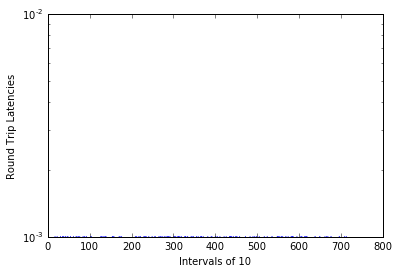

Average: 0.000225 
Std. Deviation: 0.000417582327212


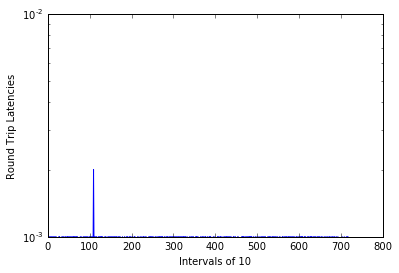

Average: 0.000529166666667 
Std. Deviation: 0.000501923383928


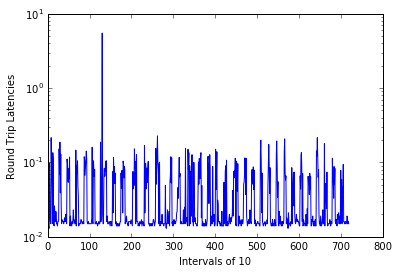

Average: 0.0455708333333 
Std. Deviation: 0.206300113062


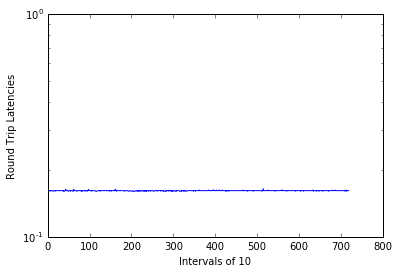

Average: 0.1608875 
Std. Deviation: 0.000440781345391


In [4]:
get_info(P1_1)
get_info(P2_1)
get_info(P3_1)
get_info(P4_1)

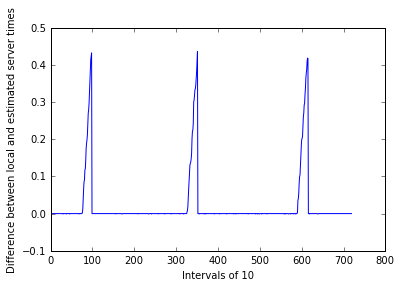

Average: 0.0224791666667 
Std. Deviation: 0.0783404047119


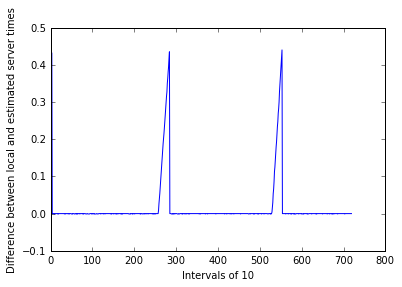

Average: 0.0177652777778 
Std. Deviation: 0.0721975427785


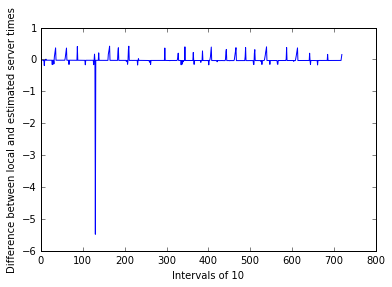

Average: -0.0217069444444 
Std. Deviation: 0.219101679735


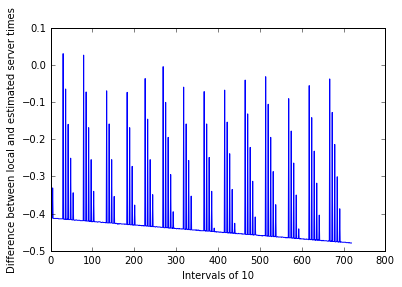

Average: -0.424025 
Std. Deviation: 0.0796070693225


In [5]:
get_christian_difference(P1_1)
get_christian_difference(P2_1)
get_christian_difference(P3_1)
get_christian_difference(P4_1)

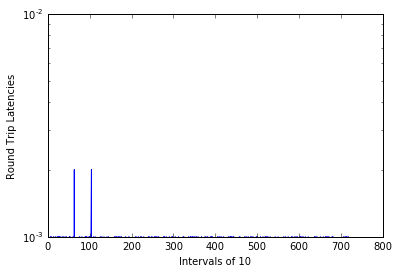

Average: 0.0002625 
Std. Deviation: 0.000446261476665


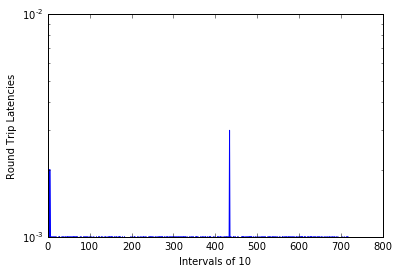

Average: 0.000497222222222 
Std. Deviation: 0.000513693656608


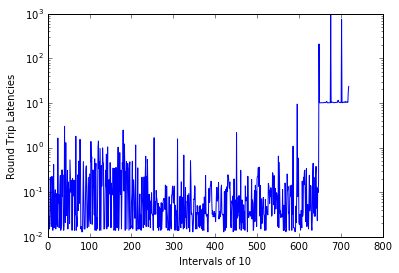

Average: 3.78573194444 
Std. Deviation: 45.5271511987


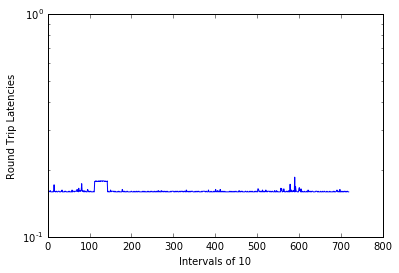

Average: 0.160413888889 
Std. Deviation: 0.00393394435775


In [6]:
get_info(P1_2)
get_info(P2_2)
get_info(P3_2)
get_info(P4_2)

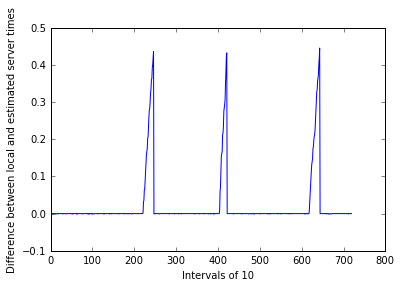

Average: 0.0218111111111 
Std. Deviation: 0.0774664650664


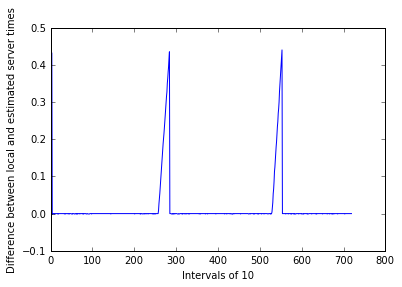

Average: 0.0177972222222 
Std. Deviation: 0.0721894921028


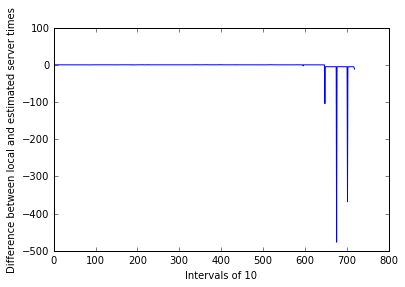

Average: -1.85195694444 
Std. Deviation: 22.7700826063


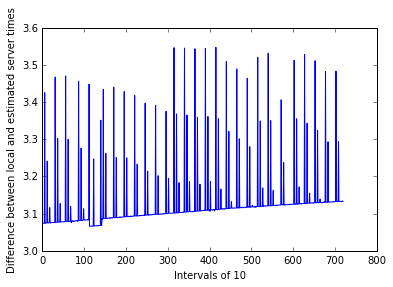

Average: 3.12744722222 
Std. Deviation: 0.0830689305006


In [7]:
get_christian_difference(P1_2)
get_christian_difference(P2_2)
get_christian_difference(P3_2)
get_christian_difference(P4_2)

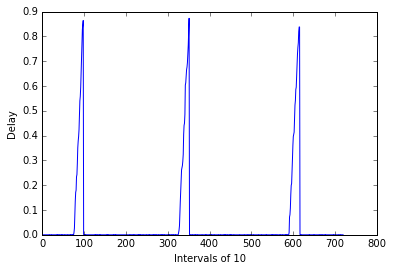

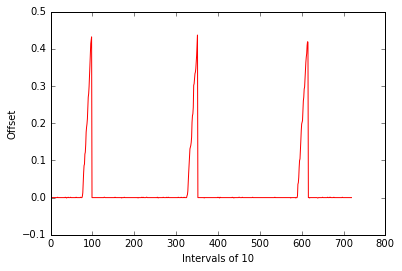

In [17]:
get_ntp_info(P1_1)

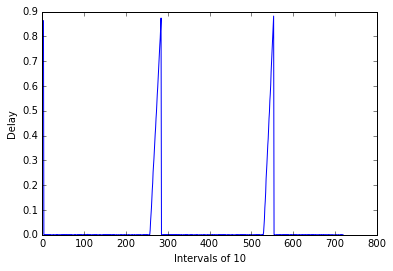

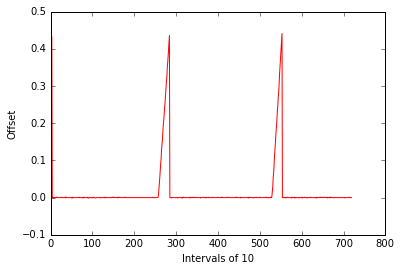

In [18]:
get_ntp_info(P2_1)

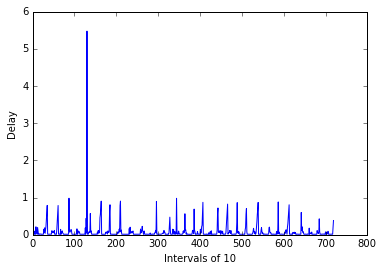

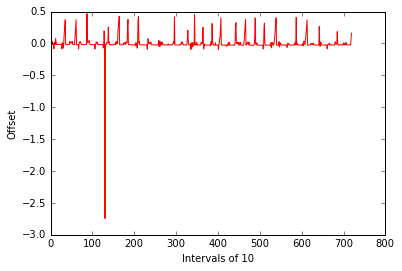

In [19]:
get_ntp_info(P3_1)

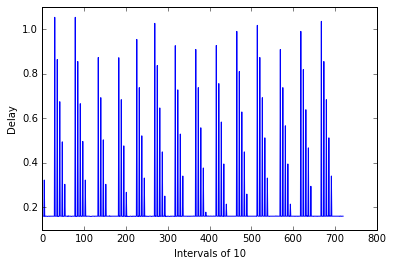

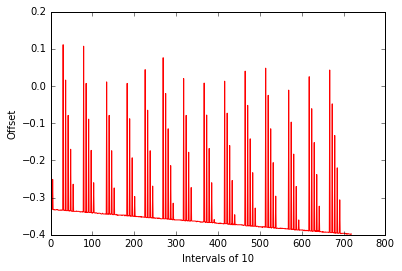

In [20]:
get_ntp_info(P4_1)

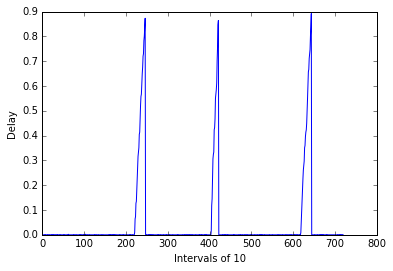

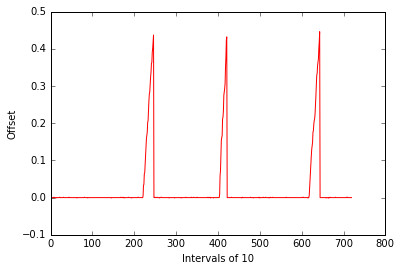

In [21]:
get_ntp_info(P1_2)

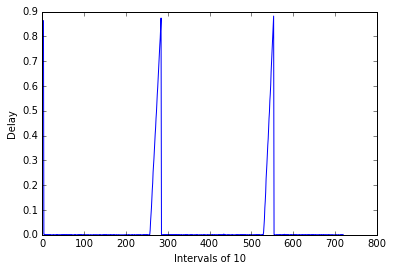

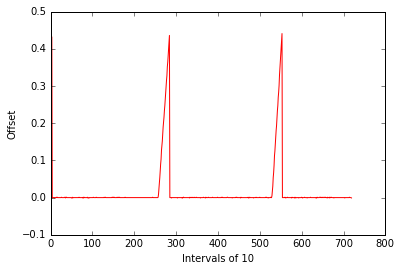

In [22]:
get_ntp_info(P2_2)

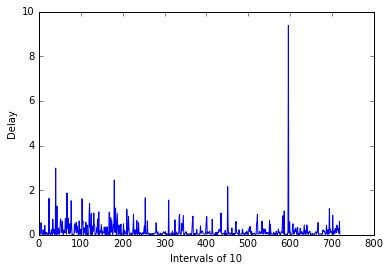

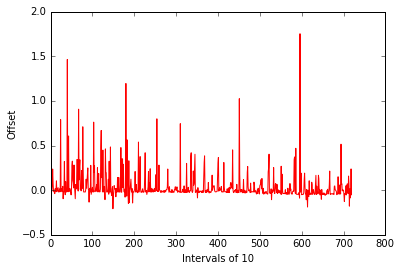

In [23]:
get_ntp_info(P3_2)

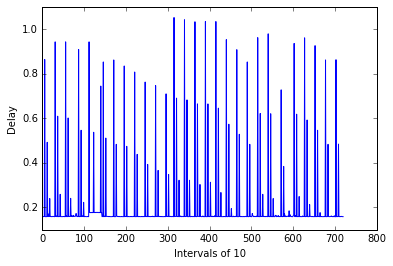

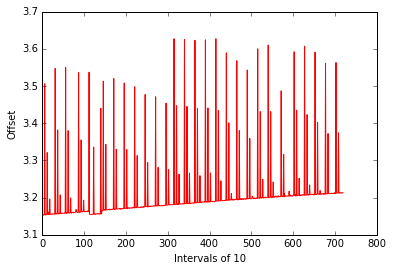

In [24]:
get_ntp_info(P4_2)